# Density cylinder tutorial

To follow this tutorial, the data test files `cntwater` of MAICoS are needed.
You can obtain it by cloning MAICoS repository:
```
    git clone git@gitlab.com:maicos-devel/maicos.git
    
```
The `airwater` data files are located in `tests/data/airwater/`. 
First, let us ignore unnecessary warnings:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

First, import MAICoS, NumPy, MDAnalysis, and PyPlot:

In [ ]:
import maicos
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

and set a few parameters for plotting purpose:

In [ ]:
fontsize = 25
font = {'family': 'sans', 'color':  'black', 
        'weight': 'normal', 'size': fontsize}
my_color_1 = np.array([0.090, 0.247, 0.560])
my_color_2 = np.array([0.235, 0.682, 0.639])
my_color_3 = np.array([1.000, 0.509, 0.333])
my_color_4 = np.array([0.588, 0.588, 0.588])

Define the path to the ``airwater`` data folder of MAICoS:

In [ ]:
datapath = "../../../../tests/data/cntwater/"

The `cntwater` system consists of a carbon nanotube (CNT) with axis in the $z$ direction, a radius of about 2 nm, a length of 2.2 nm. The CNT is filled with 810 water molecules.

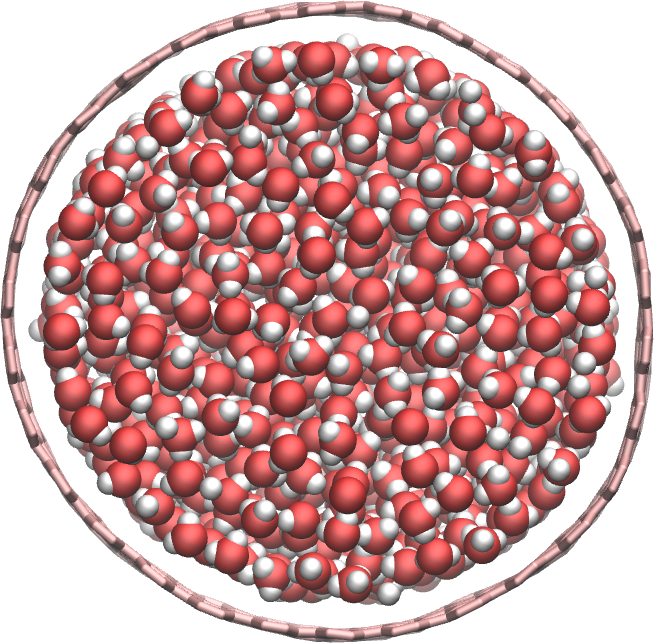

Create a universe using MDAnalysis and define a group containing
the oxygen and the hydrogen atoms of the water molecules,
as well as a group containing only the oxygen atoms, and 
a group containing only the hydrogen atoms:

In [ ]:
u = mda.Universe(datapath + 'lammps.data', 
                 datapath + 'traj.xtc')
group_H2O = u.select_atoms('type 1 or type 2')
group_CNT = u.select_atoms('type 3')

Let us print a few information about the trajectory file:

In [ ]:
print(f"The number of water molecules is {np.int32(group_H2O.n_atoms/3)}")
print(f"The number of carbon atoms is {np.int32(group_CNT.n_atoms)}")
print(f"The CNT length is {np.round(u.dimensions[2]/10,2)} nm")
timestep = np.round(u.trajectory.dt,2)
print(f"The time intervl between the frames is {timestep} ps")
total_time = np.round(u.trajectory.totaltime,2)
print(f"The total simulation time is {total_time} ps")

Call the DensityCylinder module for the two groups at once:

In [ ]:
dcyl = maicos.DensityCylinder([group_H2O, group_CNT], center='all', binwidth = 0.01)
dcyl.run()

With the keyword center='all', the center of mass of all the atoms of the group is used as the center of the density profile. If not specified, the center of the box is used.

Finally, extract the coordinates and the density profiles:

In [ ]:
rcoor = dcyl.results['r']
dens_H2O = dcyl.results['dens_mean'].T[0]
dens_CNT = dcyl.results['dens_mean'].T[1]

By default the binwidth is 0.1 nanometers, the units are kg/m$^3$,
and the axis is $z$. Plot the density profile using :

In [ ]:
fig = plt.figure(figsize=(13,6.5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel(r"$r$ coordinate (nm)", fontdict=font)
plt.ylabel(r"density (kg/m$^3$]", fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax1.plot(rcoor, dens_H2O, color=my_color_1, linewidth=4)
ax1.plot(rcoor, dens_CNT, color=my_color_2, linewidth=4)
ax1.yaxis.offsetText.set_fontsize(20)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.yaxis.offsetText.set_fontsize(30)
minor_locator_y = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator_x)
ax1.tick_params(axis='x', pad=10)
plt.show()